# Análise de Acidentes de Trânsito

Este notebook realiza uma análise exploratória dos dados de acidentes de trânsito, com foco na visualização da relação entre o tipo de acidente e o horário em que ocorrem.

In [13]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Carregamento e Preparação dos Dados

Primeiro, carregamos os dados de um arquivo JSON. Como o arquivo `datatran_consolidado.json` não está disponível, vamos criar uma amostra baseada nos dados que você forneceu para que o código possa ser executado.

In [14]:
json_path = 'datatran_consolidado.json'

with open(json_path, 'r', encoding='utf-8') as f:
    data = json.load(f)

df = pd.DataFrame(data)

df

,data_inversa,dia_semana,horario,uf,municipio,tipo_acidente,condicao_metereologica
0,01/01/2020,quarta-feira,05:40:00,PA,SAO FRANCISCO DO PARA,Saidadeleitocarrosavel,Ceu Claro
1,01/01/2020,quarta-feira,06:00:00,MG,UBERABA,Colisaotransversal,Ceu Claro
2,01/01/2020,quarta-feira,06:00:00,BA,CANUDOS,Saidadeleitocarrosavel,Nublado
3,01/01/2020,quarta-feira,10:08:00,SP,APARECIDA,Colisaotraseira,Sol
4,01/01/2020,quarta-feira,12:10:00,MG,JUATUBA,Saidadeleitocarrosavel,Ceu Claro
5,28/07/2025,segunda-feira,08:50:00,CE,FORTALEZA,Colisaotraseira,Ceu Claro
6,26/04/2025,sábado,13:30:00,MG,ARAGUARI,Saidadeleitocarrosavel,Nublado
7,28/08/2025,quinta-feira,19:20:00,PR,FOZ DO IGUACU,Saidadeleitocarrosavel,Ceu Claro
8,11/06/2025,quarta-feira,10:30:00,PR,SANTO ANTONIO DO SUDOESTE,Colisaotransversal,Ceu Claro
9,04/05/2025,domingo,20:40:00,PR,CURITIBA,AtropelamentodePedestre,Ceu Claro


### Limpeza e Transformação dos Dados

Realizamos as mesmas transformações que você fez, como renomear colunas e limpar os dados. A etapa mais importante aqui é a **conversão da coluna `horario`**.

In [15]:
# Renomear colunas
df.rename(columns={'data_inversa': 'data', 'dia_semana': 'DiaSemana', 'tipo_acidente': 'TipoAcidente', 'condicao_metereologica': 'CondicaoMetereologica'}, inplace=True)

# Filtrar linhas onde TipoAcidente não é 'none'
df = df[df['TipoAcidente'].astype(str).str.lower() != 'none']

# Remover espaços do TipoAcidente
df['TipoAcidente'] = df['TipoAcidente'].str.replace(' ', '')

# **[CORREÇÃO]** Converter a coluna 'horario' para um valor numérico (hora do dia)
# Isso transforma a string 'HH:MM:SS' em um número de 0 a 23, que pode ser usado em gráficos.
df['hora_do_dia'] = pd.to_datetime(df['horario'], format='%H:%M:%S').dt.hour

# Exibir as primeiras linhas para verificar a nova coluna
df.head()

,data,DiaSemana,horario,uf,municipio,TipoAcidente,CondicaoMetereologica,hora_do_dia
0,01/01/2020,quarta-feira,05:40:00,PA,SAO FRANCISCO DO PARA,Saidadeleitocarrosavel,Ceu Claro,5
1,01/01/2020,quarta-feira,06:00:00,MG,UBERABA,Colisaotransversal,Ceu Claro,6
2,01/01/2020,quarta-feira,06:00:00,BA,CANUDOS,Saidadeleitocarrosavel,Nublado,6
3,01/01/2020,quarta-feira,10:08:00,SP,APARECIDA,Colisaotraseira,Sol,10
4,01/01/2020,quarta-feira,12:10:00,MG,JUATUBA,Saidadeleitocarrosavel,Ceu Claro,12


## 2. Visualização dos Dados

Agora que os dados estão preparados, podemos criar visualizações adequadas.

### Gráfico 1: Contagem de Tipos de Acidente

Um gráfico de barras é ideal para ver a frequência de cada tipo de acidente.

C:\Users\Fábio\AppData\Local\Temp\ipykernel_17724\739409567.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='TipoAcidente', order=df['TipoAcidente'].value_counts().index, palette='viridis')


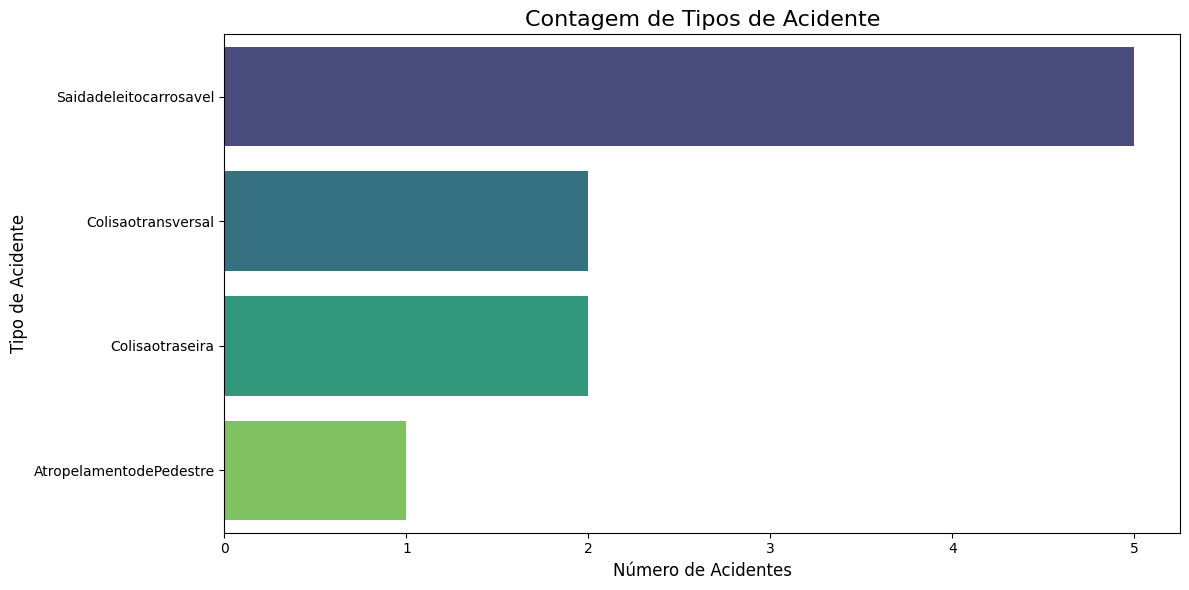

In [16]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='TipoAcidente', order=df['TipoAcidente'].value_counts().index, palette='viridis')
plt.title('Contagem de Tipos de Acidente', fontsize=16)
plt.xlabel('Número de Acidentes', fontsize=12)
plt.ylabel('Tipo de Acidente', fontsize=12)
plt.tight_layout() # Ajusta o gráfico para não cortar os rótulos
plt.show()

### Gráfico 2: Distribuição de Horários por Tipo de Acidente (Boxplot)

Este é o gráfico que resolve o problema original. Um boxplot nos permite visualizar a distribuição da `hora_do_dia` (eixo numérico) para cada `TipoAcidente` (eixo categórico).

C:\Users\Fábio\AppData\Local\Temp\ipykernel_17724\1851991707.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='hora_do_dia', y='TipoAcidente', palette='coolwarm', order=df['TipoAcidente'].value_counts().index)


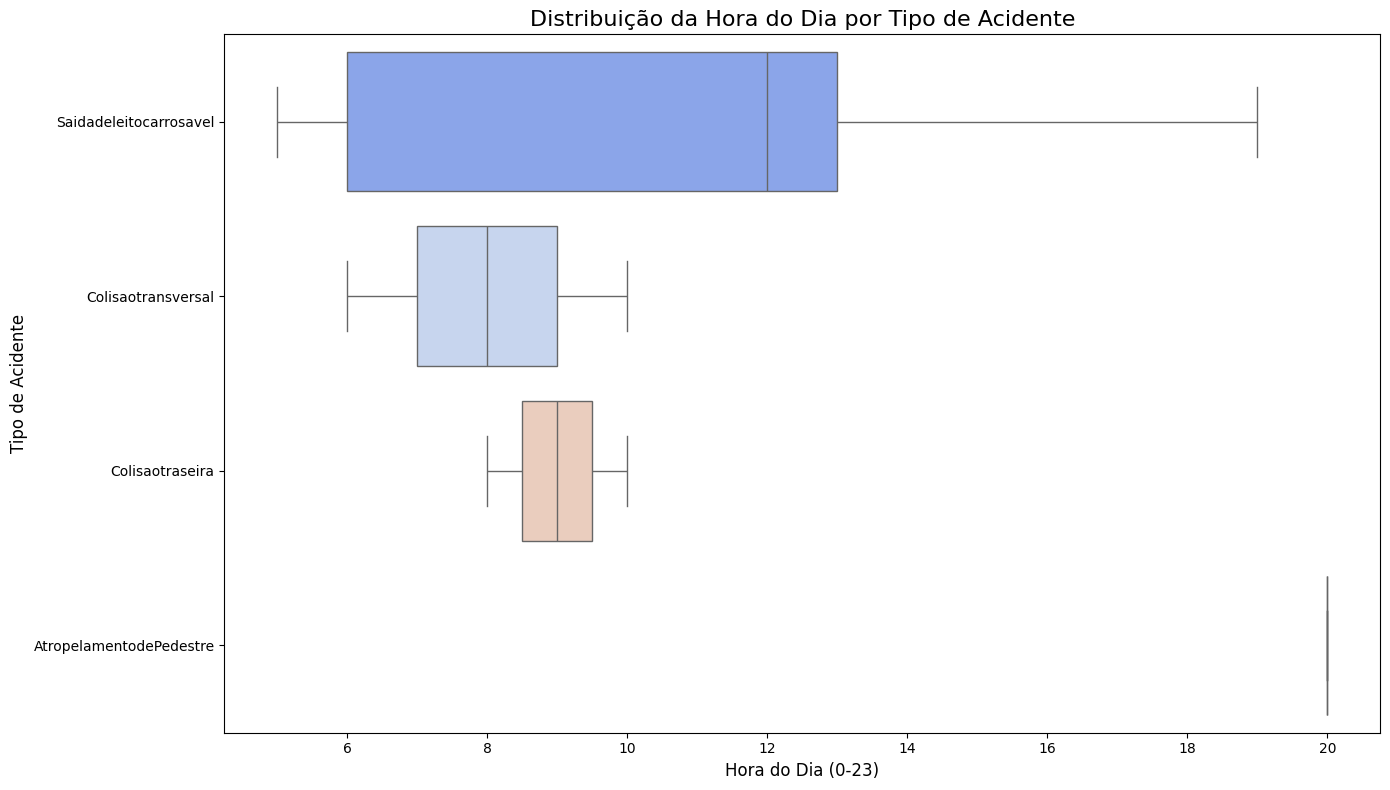

In [17]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='hora_do_dia', y='TipoAcidente', palette='coolwarm', order=df['TipoAcidente'].value_counts().index)
plt.title('Distribuição da Hora do Dia por Tipo de Acidente', fontsize=16)
plt.xlabel('Hora do Dia (0-23)', fontsize=12)
plt.ylabel('Tipo de Acidente', fontsize=12)
plt.tight_layout()
plt.show()